In [ ]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

# Detección de caras (Face detection)

La detección de caras es un caso específico de la detección de objetos. En este caso, lo que se busca encontrar y localizar es un rostro humano.

El estado de arte hoy está dominado por redes convolucionales profundas. Sin embargo, un algoritmo de la era previa, inventado en 2001, es lo suficientemente efectivo y, además, muy liviano y veloz, para preservarse en uso en la actualidad y hacer frente a la competencia de las redes profundas. Estamos hablando del [algoritmo de Viola & Jones](https://www.merl.com/publications/docs/TR2004-043.pdf), con cascadas de HAAR, que es el que se usa nativamente en `OpenCV`.

Si bien en la práctica la división de una imagen en subrregiones se suele computar en paralelo, podemos pensar en el concepto de ventana deslizante para entender cómo funciona esta técnica. Dada una imagen, la recorremos con una ventana deslizante de un tamaño fijo y vamos extrayendo recortes. Sobre cada uno de estos recortes vamos a intentar decidir si contiene una cara o no. Este procedimiento lo podemos hacer con ventanas de diferentes tamaños:

<div align="center">
<img src="https://pyimagesearch.com/wp-content/uploads/2014/10/sliding_window_example.gif" width="100px" height="150px">
</div>





Ahora, el problema se resume a, dado un recorte del tamaño de una cara, decidir si hay una cara o no. Para esto, el algoritmo extrae caracteristicas de este recorte, las características de Haar (su nombre se debe a su similitud con unas ondas llamadas ondas de Haar).

Una característica de Haar consiste esencialmente en cálculos que se realizan en regiones rectangulares adyacentes en una ubicación específica de la ventana de detección. El cálculo implica sumar las intensidades de píxeles en cada región y calcular las diferencias entre esas sumas. Estos son algunos ejemplos de características de Haar:

<div align="center">
<img src="https://miro.medium.com/max/428/1*yl-BqUzycbyfhPAzwWOddQ.png" width="250px" height="250px">
</div>

Un paso que aquí obviaremos es el cálculo de la imagen integral, que se utiliza para acelerar el tiempo de computo de las caracteristicas de Haar de las regiones.


El último paso es la utilización de una "cascada" de algoritmos de clasificación (AdaBoost) construidos sobre diferentes caracteristicas de Haar. En el primer paso, se verifican ciertas caracteristicas. Si el clasificador produce una baja probabilidad de que haya un rostro, el recorte se descarta inmediatamente, evitando malgastar tiempo en regiones de la imagen sin rostro. Esto es fundamental, ya que típicamente una imagen tendrá muy pocos recortes con presencia de rostros y gastar computo en descartarlos volvería al algoritmo muy lento. En el caso en que el primer paso produzca una probabilidad buena, se pasa al siguiente clasificador, que, nuevamente, tiene poder de veto sobre el recorte.

En el video podemos ver cómo los recortes sin rostro son descartados con poco costo, mientras que en las regiones donde se encuentra un rostro el algoritmo se detiene y avanza más pasos, dedicando más recursos: computando más características de Haar y evaluando subsecuentes clasificadores.

Si el recorte logra atravesar toda la cascada de clasificadores sin ser descartado, entonces una cara fue encontrada.

Este procedimiento, con diferentes clasificadores y diferentes características de Haar se utiliza para otro tipo de detección de objetos, no solo para rostros.

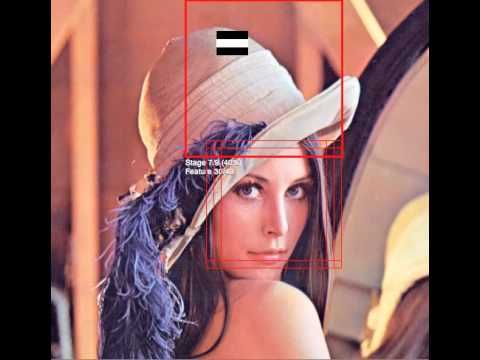

In [ ]:
YouTubeVideo("hPCTwxF0qf4")

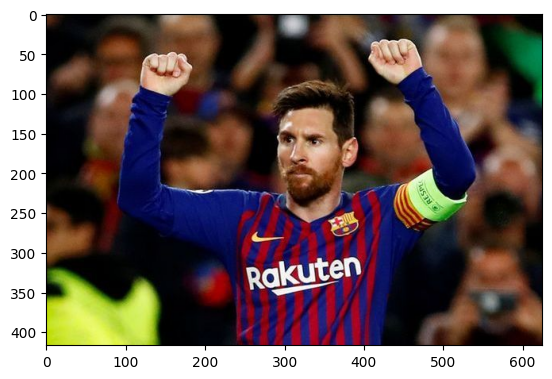

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/messi.jpg")
plt.imshow(img[:, :, [2, 1, 0]]);

In [ ]:
# El algoritmo de cascadas de Haar funciona sobre imagenes en escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Instanciamos el objeto con la definiciones relevantes a deteccion de rostros
# Como dijimos anteriormente, este "Cascade Classifier" puede usarse para detectar otro tipo de objetos
import os
if not os.path.exists("haarcascade_frontalface_default.xml"):
  !wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

--2025-04-30 00:58:07--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2025-04-30 00:58:07 (12.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
# Finalmente, aplicamos el detector a la imagen
faces = face_cascade.detectMultiScale(img_gray)
# Obtenemos una cara
len(faces)

3

In [ ]:
#faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)
# Obtenemos una cara
#len(faces)

In [ ]:
# El resultado consiste de 4 numeros, los dos primeros especificando
# la esquina superior izquierda de la region en la que se detectó un restros
# Y los siguiente el ancho y el alto de la region

x, y, w, h = faces[1]

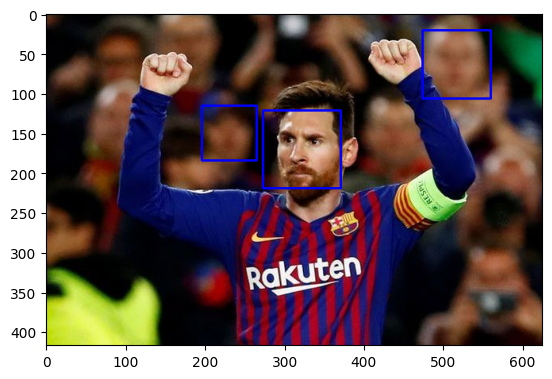

In [ ]:
# Lo graficamos usando cv2.rectangle

cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(img[:, :, [2, 1, 0]]);

###Recurso

[Computer Vision: Algorithms and Applications, 2nd ed.](https://szeliski.org/Book/)